# Importe de bibliotecas

In [ ]:
%matplotlib inline
#!pip install -U scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn import model_selection  
import sklearn.model_selection
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print(sklearn.__version__)
#!pip install -U pandas-profiling

from pandas_profiling import ProfileReport

# Carga e AED

Classificação das variáveis

Source data - https://archive.ics.uci.edu/ml/datasets/Wine

Original Owners: Forina, M. et al, PARVUS -
An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,16147 Genoa, Italy.

Donor: Stefan Aeberhard, email: stefan '@' coral.cs.jcu.edu.au

Data Set Information: These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. The initial data set had around 30 variables, but for some reason only have the 13 dimensional version.

In [170]:
#1) Alcohol
#2) Malic acid
#3) Ash
#4) Alcalinity of ash
#5) Magnesium
#6) Total phenols
#7) Flavanoids
#8) Nonflavanoid phenols
#9) Proanthocyanins
#10)Color intensity
#11)Hue
#12)OD280/OD315 of diluted wines
#13)Proline

names = ['Class', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Phenols', 'Flavonoids', 
         'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315', 'Proline']
df = pd.read_csv("C:/Users/Carina/OneDrive/Notebook Dell/Tech/wine/wine.data", names=names)
df.head()

Class  Alcohol  Malic Acid   Ash  Alcalinity of ash  Magnesium  Phenols  \
0      1    14.23        1.71  2.43               15.6        127     2.80   
1      1    13.20        1.78  2.14               11.2        100     2.65   
2      1    13.16        2.36  2.67               18.6        101     2.80   
3      1    14.37        1.95  2.50               16.8        113     3.85   
4      1    13.24        2.59  2.87               21.0        118     2.80   

   Flavonoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280/OD315  Proline  
0         3.92     1065  
1         3.40     1050  
2         3.17     1185  
3         3.45     1480  
4         2.93      735

Análise exploratória dos dados

In [171]:
df.describe()

Class     Alcohol  Malic Acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium     Phenols  Flavonoids  Nonflavanoid phenols  \
count  178.000000  178.000000  178.000000            178.000000   
mean    99.741573    2.295112    2.029270              0.361854   
std     14.282484    0.625851    0.998859              0.124453   
min     70.000000    0.980000    0.340000              0.130000   
25%     88.000000    1.742500    1.205000              0.270000   
50%     98.000000    2.355000    2.135000              0.340000   
75%    107.000000    2.800000    2.875000              0.437500   
max    162.000000    3.880000    5.080000              0.660000   

       Proanthocyanins  Color intensity         Hue  OD280/OD315      Proline  
count       178.000000       178.000000  178.000000   178.000000   178.000000  
mean          1.590899         5.058090    0.957449     2.611685   746.893258  
std           0.572359         2.318286    0.228572     0.709990   314.907474  
min           0.410000         1.280000    0.480000     1.270000   278.000000  
25%           1.250000         3.220000    0.782500     1.937500   500.500000  
50%           1.555000         4.690000    0.965000     2.780000   673.500000  
75%           1.950000         6.200000    1.120000     3.170000   985.000000  
max           3.580000        13.000000    1.710000     4.000000  1680.000000

In [172]:
df.isna().sum()

Class                   0
Alcohol                 0
Malic Acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Phenols                 0
Flavonoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
OD280/OD315             0
Proline                 0
dtype: int64

In [173]:
df.nunique()

Class                     3
Alcohol                 126
Malic Acid              133
Ash                      79
Alcalinity of ash        63
Magnesium                53
Phenols                  97
Flavonoids              132
Nonflavanoid phenols     39
Proanthocyanins         101
Color intensity         132
Hue                      78
OD280/OD315             122
Proline                 121
dtype: int64

In [174]:
df.dtypes

Class                     int64
Alcohol                 float64
Malic Acid              float64
Ash                     float64
Alcalinity of ash       float64
Magnesium                 int64
Phenols                 float64
Flavonoids              float64
Nonflavanoid phenols    float64
Proanthocyanins         float64
Color intensity         float64
Hue                     float64
OD280/OD315             float64
Proline                   int64
dtype: object

In [175]:
profile = ProfileReport(df, title='Profiling Wine',html={'style':{'full_width':True}})

In [83]:
profile.to_notebook_iframe()

In [202]:
df.head()

Class  Alcohol  Malic Acid   Ash  Alcalinity of ash  Magnesium  Phenols  \
0      1    14.23        1.71  2.43               15.6        127     2.80   
1      1    13.20        1.78  2.14               11.2        100     2.65   
2      1    13.16        2.36  2.67               18.6        101     2.80   
3      1    14.37        1.95  2.50               16.8        113     3.85   
4      1    13.24        2.59  2.87               21.0        118     2.80   

   Flavonoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280/OD315  Proline  
0         3.92     1065  
1         3.40     1050  
2         3.17     1185  
3         3.45     1480  
4         2.93      735

In [177]:
print(df.groupby('Class').size())

Class
1    59
2    71
3    48
dtype: int64


# Relatórios e gráficos

## Caixa e bigode

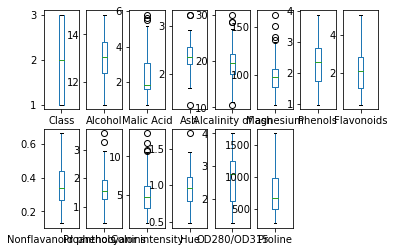

In [178]:
df.plot(kind='box', subplots=True, layout=(2,8), sharex=False, sharey=False)
plt.show()

## Histogramas

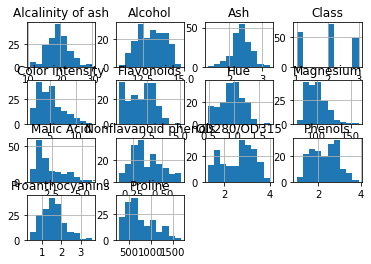

In [179]:
df.hist()
plt.show()

## Gráficos de dispersão

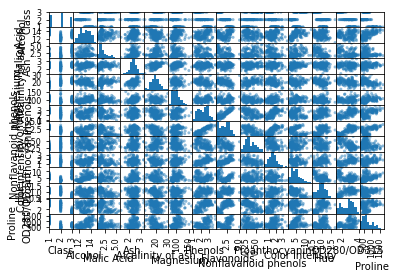

In [180]:
scatter_matrix(df)
plt.show()

## Divisão em treino e teste

In [198]:
array = df.values
X = array[:,0:14]
Y = array[:,0]
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)
print(X)
print(Y)

[[1.000e+00 1.423e+01 1.710e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.000e+00 1.320e+01 1.780e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.000e+00 1.316e+01 2.360e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [3.000e+00 1.327e+01 4.280e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [3.000e+00 1.317e+01 2.590e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [3.000e+00 1.413e+01 4.100e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]


## Análise de algoritmos

In [211]:
# Test options and evaluation metric
scoring = 'accuracy'

In [200]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
##print(models)
#cv_results = model_selection.cross_val_score(LogisticRegression(solver='liblinear', multi_class='ovr'), X_train, y_train, cv=kfold, scoring=scoring)
#print(cv_results)
for name, model in models:
    kfold = model_selection.KFold(n_splits=10,)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.950641 (0.040344)
LDA: 0.983333 (0.033333)
KNN: 0.676923 (0.103211)
CART: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
SVM: 0.360897 (0.118479)


## Comparação dos algorítmos

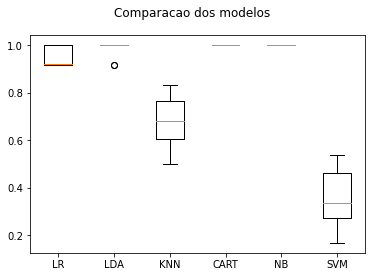

In [203]:
fig = plt.figure()
fig.suptitle('Comparacao dos modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Predições nos dados de teste

In [208]:
cart = DecisionTreeClassifier()
cart.fit(X_train, y_train)
predictions = cart.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

1.0
[[13  0  0]
 [ 0 24  0]
 [ 0  0 17]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00        24
         3.0       1.00      1.00      1.00        17

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [209]:
print(y_test)
print (predictions)

[3. 1. 3. 3. 2. 3. 2. 1. 2. 3. 1. 2. 3. 2. 2. 2. 2. 3. 1. 1. 2. 2. 2. 2.
 1. 3. 2. 3. 3. 3. 2. 1. 3. 2. 2. 2. 3. 3. 1. 3. 1. 2. 3. 3. 2. 1. 1. 2.
 2. 2. 2. 2. 1. 1.]
[3. 1. 3. 3. 2. 3. 2. 1. 2. 3. 1. 2. 3. 2. 2. 2. 2. 3. 1. 1. 2. 2. 2. 2.
 1. 3. 2. 3. 3. 3. 2. 1. 3. 2. 2. 2. 3. 3. 1. 3. 1. 2. 3. 3. 2. 1. 1. 2.
 2. 2. 2. 2. 1. 1.]
